<a href="https://colab.research.google.com/github/GOPIKAV77/Python/blob/main/dummy_variables_example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dummy** **variables**:  By using dummy variables, we can introduce categorical data in regression models. A dummy variable can take  values like 0 and 1.

The given dataset contains columns: service call, months_since_last_service, type_of_service, repair_time_in_hours.

Here type_of_repair is either electrical or mechanical. This is critical in determining the repair_time_in_hours. So we convert this electrical or mechanical into 0 or 1.

In [4]:
import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as s


import pandas as pd
df = pd.read_excel("dummy.xlsx")
df.head()

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9


Linear Regression

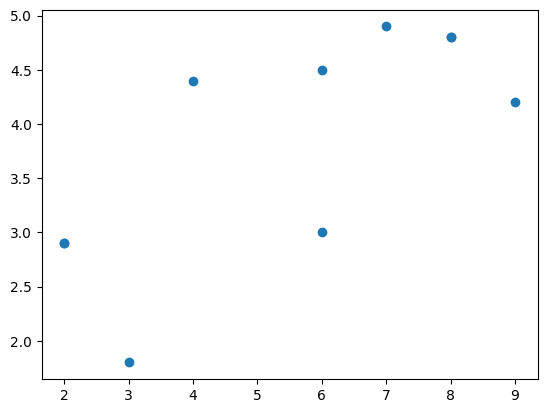

In [12]:
plt.scatter(df["months_since_last_service"],df["repair_time_in_hours"])

In [8]:
from statsmodels.formula.api import ols
m = ols(formula="repair_time_in_hours~ months_since_last_service", data = df)
result = m.fit()
result.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Sat, 22 Feb 2025   Prob (F-statistic):             0.0163
Time:                          13:37:33   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.1473      0.605      3.549      0.008       0.752       3.542
months_since_last_service     0.3041      0.100      3.029      0.016       0.073       0.536
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.751
Skew:                          -0.501   Prob(JB):                        0.687
Kurtosis:                       2.107   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**RESULT**

```
	coef	std err	t	P>|t|	[0.025	0.975]
Intercept	2.1473	0.605	3.549	0.008	0.752	3.542
months_since_last_service	0.3041	0.100	3.029	0.016	0.073	0.536


Y = 2.15 + 0.304 x1

**QQPLOT**

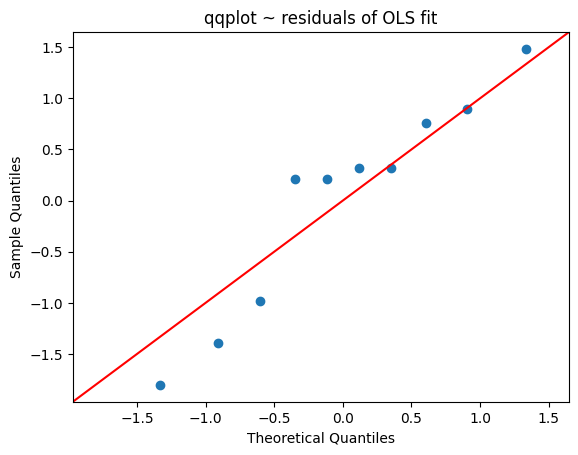

In [14]:
probplot = s.ProbPlot(result.resid, stats.norm, fit= True)
fig = probplot.qqplot(line = '45')
h = plt.title('qqplot ~ residuals of OLS fit')
plt.show()

Changing electrical and mechanical into 0 and 1

In [17]:
dummies = pd.get_dummies(df["type_of_repair"])
dummies = dummies.astype(int)
dummies.head()

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


The dataset becomes,

In [19]:
step = pd.concat([df, dummies], axis = 1)
step.drop(["type_of_repair","mechanical"],inplace=True,axis=1)
step

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


OLS

In [26]:
result = sm.ols("repair_time_in_hours ~ months_since_last_service+electrical",data=step).fit()
result.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Sat, 22 Feb 2025   Prob (F-statistic):            0.00105
Time:                          14:17:01   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.9305      0.467      1.993      0.087      -0.174       2.035
months_since_last_service     0.3876      0.063      6.195      0.000       0.240       0.536
electrical                    1.2627      0.314      4.020      0.005       0.520       2.005
==============================================================================
Omnibus:                        3.357   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.663
Skew:                           0.994   Prob(JB):                        0.435
Kurtosis:                       2.795   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**RESULT**

```
coef	std err	t	P>|t|	[0.025	0.975]
Intercept	0.9305	0.467	1.993	0.087	-0.174	2.035
months_since_last_service	0.3876	0.063	6.195	0.000	0.240	0.536
electrical	1.2627	0.314	4.020	0.005	0.520	2.005


Y = 0.9305 + 0.3876 x1 + 1.2627 x2